# TZ Gaming: Optimal Targeting of Mobile Ads

In [1]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyrsm as rsm
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn import preprocessing
from statsmodels.genmod.families import Binomial
from statsmodels.genmod.families.links import logit

# increase plot resolution
# mpl.rcParams["figure.dpi"] = 200

In [2]:
# loading data
tz_gaming = pd.read_pickle("data/tz_gaming.pkl")

In [3]:
# see data description
rsm.describe(tz_gaming)

### TZ Gaming: Optimal Targeting of Mobile Ads

Each row in the `tz_gaming` dataset represents an impression. For each row (impression), we have data on 21 variables. All explanatory variables are created by Vneta based on one month tracking history of users, apps, and ads. The available variables are described in below. 

* _training_ -- Dummy variable that splits the dataset into a training ("train") and a test ("test") set
* _inum_ -- Impression number
* _click_ -- Click indicator for the TZ ad served in the impression. Equals "yes" if the ad was clicked and "no" otherwise
* _time_ -- The hour of the day in which the impression occurred (1-24). For example, "2" indicates the impression occurred between 1 am and 2 am
* _time\_fct_ -- Same as _time_ but the is coded as categorical 
* _app_ -- The app in which the impression was shown. Ranges from 1 to 49
* _mobile\_os_ -- Customer's mobile OS
* _impup_ -- Number of past impressions the user has seen in the app
* _clup_ -- Number of past impressions the user has clicked on in the app
* _ctrup_ -- Past CTR (Click-Through Rate) (x 100) for the user in the app
* _impua_ -- Number of past impressions of the TZ ad that the user has seen across all apps
* _clua_ -- Number of past impressions of the TZ ad that the user has clicked on across all apps
* _ctrua_ -- Past CTR (x 100) of the TZ ad by the user across all apps
* _imput_ -- Number of past impressions the user has seen within in the hour
* _clut_ -- Number of past impressions the user has clicked on in the hour
* _ctrut_ -- Past CTR (x 100) of the user in the hour
* _imppat_ -- Number of past impressions that showed the TZ ad in the app in the hour
* _clpat_ -- Number of past clicks the TZ ad has received in the app in the hour
* _ctrpat_ -- Past CTR (x 100) of the TZ ad in the app in the hour
* _rnd_ -- Simulated data from a normal distribution with mean 0 and a standard deviation of 1
* _pred\_vneta_ -- Predicted probability of click per impressions generated by Vneta's proprietary machine learning algorithm
* id -- Anonymized user ID

Note that there is a clear relationship between the impressions, clicks, and ctr variables within a strata. Specifically: 

* ctrup = clup/impup
* ctru = clu/impu
* ctrut = clut/imput
* ctrpat = clpat/impat

The last three letters of a feature indicate the sources of variation in a variable:

* u — denotes user
* t — denotes time
* p — denotes app
* a — denotes ad 



## Part I: Logistic regression

a. Estimate a logistic regression model with the following variables `time_fct app mobile_os impua clua ctrua` as the explanatory variables (features) and `click_yes` as the response variable (target)

> Note: Use only the rows that are labeled `train` in the `training` variable

In [4]:
tz_gaming["click_yes"] = rsm.ifelse(tz_gaming.click == "yes", 1, 0)

In [5]:
# Logistic regression via statsmodel (using the formula API)
lr = smf.glm(
    formula="click_yes ~ time_fct + app + mobile_os + impua + clua + ctrua",
    family=Binomial(link=logit()),
    data= tz_gaming[tz_gaming['training']=='train']
).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              click_yes   No. Observations:                87535
Model:                            GLM   Df Residuals:                    87458
Model Family:                Binomial   Df Model:                           76
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3946.1
Date:                Fri, 04 Feb 2022   Deviance:                       7892.1
Time:                        06:09:50   Pearson chi2:                 1.60e+05
No. Iterations:                    27                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -3.5282      0.197    -17.936      0.000      -3.914      -3.143
time_fct[T.2]         -0.4741      0.321     -1.478      0.139      -1.103       0.155
time_fct[T.3]         -0.3317      0.454     -0.730      0.466      -1.222       0.559
time_fct[T.4]        -23.5430    4.2e+04     -0.001      1.000   -8.24e+04    8.23e+04
time_fct[T.5]        -23.7205   5.52e+04     -0.000      1.000   -1.08e+05    1.08e+05
time_fct[T.6]         -1.0516      1.021     -1.030      0.303      -3.053       0.950
time_fct[T.7]          0.1997      0.426      0.468      0.640      -0.636       1.036
time_fct[T.8]          0.0992      0.296      0.335      0.737      -0.481       0.679
time_fct[T.9]          0.0289      0.287      0.101      0.920      -0.534       0.592
time_fct[T.10]        -0.1866      0.295     -0.633      0.527      -0.764       0.391
time_fct[T.11]        -0.4515      0.276     -1.635      0.102      -0.993       0.090
time_fct[T.12]        -0.1351      0.280     -0.483      0.629      -0.683       0.413
time_fct[T.13]        -0.5281      0.290     -1.823      0.068      -1.096       0.040
time_fct[T.14]         0.0944      0.225      0.419      0.675      -0.347       0.536
time_fct[T.15]        -0.0140      0.225     -0.062      0.951      -0.455       0.428
time_fct[T.16]         0.0453      0.233      0.195      0.846      -0.411       0.502
time_fct[T.17]         0.0138      0.250      0.055      0.956      -0.477       0.504
time_fct[T.18]         0.0595      0.247      0.241      0.809      -0.424       0.543
time_fct[T.19]         0.2500      0.233      1.072      0.284      -0.207       0.707
time_fct[T.20]         0.2019      0.231      0.873      0.382      -0.251       0.655
time_fct[T.21]        -0.1422      0.244     -0.584      0.559      -0.620       0.335
time_fct[T.22]        -0.0302      0.238     -0.127      0.899      -0.496       0.436
time_fct[T.23]         0.0428      0.238      0.180      0.857      -0.424       0.509
time_fct[T.24]         0.0941      0.229      0.410      0.682      -0.356       0.544
app[T.app2]           -2.0905      0.229     -9.127      0.000      -2.539      -1.642
app[T.app3]           -1.6937      1.003     -1.689      0.091      -3.659       0.272
app[T.app4]           -0.9601      0.321     -2.988      0.003      -1.590      -0.330
app[T.app5]           -1.2644      1.005     -1.258      0.208      -3.234       0.705
app[T.app6]           -0.4288      0.175     -2.457      0.014      -0.771      -0.087
app[T.app7]           -0.5169      1.007     -0.513      0.608      -2.491       1.458
app[T.app8]          -24.3740   7.17e+04     -0.000      1.000   -1.41e+05     1.4e+05
app[T.app9]           -0.2899      0.236     -1.227      0.220      -0.753       0.173
app[T.app10]         -23.8906   6.71e+

b. Summarize and interpret the logistic regression results. Provide an interpretation of the odds-ratios estimated for the explanatory variables `mobile_os`, `impua`, `clua`, and `ctrua` and an evaluation of the model as a whole. Which of these explanatory variables are statistically significant? Which variables seem to be most "important"?

> Hint: The Chi-square test for a logistic regression model is equivalent to an F-test for a linear regression model

In [6]:
import pyrsm as rsm
rsm.or_ci(lr)[71:]

,index,OR,OR%,2.5%,97.5%,p.values,
72,mobile_os[T.ios],0.450,-55.0%,0.387,0.523,< .001,***
73,mobile_os[T.other],0.719,-28.1%,0.502,1.029,0.072,.
74,impua,0.979,-2.1%,0.975,0.982,< .001,***
75,clua,1.295,29.5%,1.156,1.451,< .001,***
76,ctrua,1.022,2.2%,1.017,1.026,< .001,***


The above table shows odds-ratios for the explanatory variables mobile_os, impua, clua, and ctrua. <br />
The Odds ratio for mobile IOS is 0.45, which indicates that for impression on ios mobile, the odds of click decrease by a factor of 0.45 compared with impressions on android,keeping all other variables constant.  <br />
The Odds ratio for mobile other is 0.719, which indicates that for impression on other mobile, the odds of click decrease by a factor of 0.719 compared with impressions on android,keeping all other variables constant.  <br />
The Odds ratio for impua is 0.979, which indicates that for every 1 impression increase in impua, the odds of click decrease by a factor of 0.979, keeping all other variables constant.  <br />
The Odds ratio for clua is 1.295, which indicates that for every 1 impression increase in clua, the odds of click  increase by a factor of 1.295, keeping all other variables constant.  <br />
The Odds ratio for ctrua is 1.022, which indicates that for every 1 increase in ctrua, the odds of click increase by a factor of 1.022,keeping all other variables constant. <br />


All variables with a p value smaller than 0.001 are statistically significant.
Of the 4 variables listed in the prompt,the variable mobil_os_ios could be the most important as it has the biggest effect on the odds of click.

We evaluate the overall model through the Chi-square and associated p-value. The Chi-squared is 159784.981 and p.value < 0.001. The small p.values indicates that we can reject null hypothesis.The Pseudo R-squared is 0.109, which indicates that there are room for this model to improve with additional data.

<AxesSubplot:xlabel='Odds-ratio'>

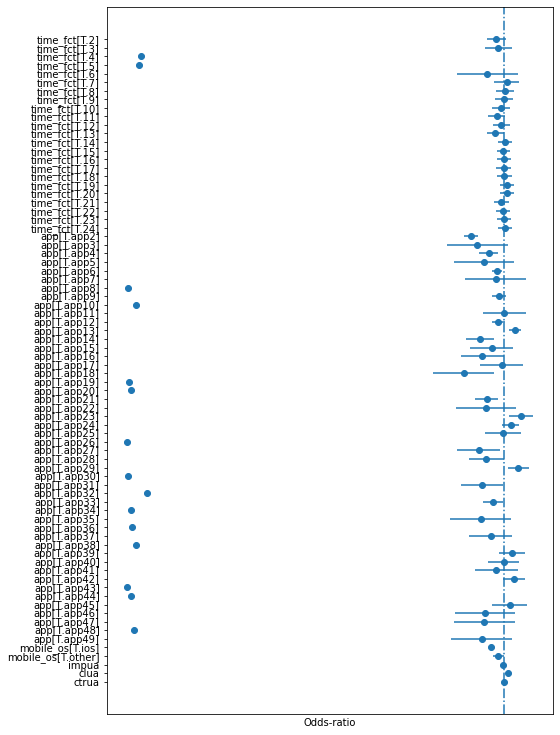

In [7]:
rsm.or_plot(lr,figsize=[8, 13])

In [8]:
rsm.model_fit(lr)


Pseudo R-squared (McFadden): 0.109
Pseudo R-squared (McFadden adjusted): 0.092
Area under the RO Curve (AUC): 0.792
Log-likelihood: -3946.072, AIC: 8046.145, BIC: 8768.389
Chi-squared: 159784.981 df(76), p.value < 0.001 
Nr obs: 87,535



c. Predict the probability of a click

The estimated logistic regression model can predict the probability of `click_yes == 1`. Create a new variable `pred_logit` with the predicted click-through probabilities linked to each impression. Make sure to generate predictions for all rows in the training and test data.

In [9]:
tz_gaming["pred_logit"] =rsm.predict_ci(lr,tz_gaming)['prediction']

d. Re-estimate the logistic regression after standardizing the numeric explanatory variables (see sample code below). What is the interpretation of the standardized odds-ratios for the explanatory variables? Which variables seem to be most important now and how does this compare to your conclusions from (b) above? Has the model fit changed after you standardized the variables?

> Tip: Use `or_plot` from the `pyrsm` packages to visualize the (standardized) odds-ratios.

> Tip: Check the mean, std, min, and max for the transformed variables

In [10]:
# select variables to standardize
to_std = tz_gaming.loc[:, "impup":"ctrpat"].columns

# scale numeric variables by (x - mean(x)) / sd(x)
tz_std = tz_gaming.copy()
tz_std[to_std] = rsm.scale_df(
    tz_gaming[to_std], sf=1, train=tz_gaming.training == "train"
)

In [11]:
df_m = pd.DataFrame().assign(Min = tz_std[to_std].min(), Max = tz_std[to_std].max(), STD = tz_std[to_std].std())
df_m

,Min,Max,STD
impup,-0.567816,22.296324,1.002776
clup,-0.496443,49.186077,0.992606
ctrup,-0.258456,30.335937,1.040919
impua,-0.628822,23.681251,1.032626
clua,-0.328254,26.846906,1.016477
ctrua,-0.176809,17.739926,1.005684
imput,-0.511386,45.026903,0.977142
clut,-0.328451,46.322200,1.003530
ctrut,-0.185081,25.064466,1.003459
imppat,-0.887617,2.889797,1.034921


In [12]:
# estimate your model and assign the fitted model to lr_std
lr_std = smf.glm(
    formula="click_yes ~ time_fct + app + mobile_os + impua + clua + ctrua",
    family=Binomial(link=logit()),
    data= tz_std[tz_std['training']=='train']
).fit()

In [13]:
rsm.or_ci(lr_std)[71:]

,index,OR,OR%,2.5%,97.5%,p.values,
72,mobile_os[T.ios],0.450,-55.0%,0.387,0.523,< .001,***
73,mobile_os[T.other],0.719,-28.1%,0.502,1.029,0.072,.
74,impua,0.236,-76.4%,0.184,0.303,< .001,***
75,clua,1.176,17.6%,1.095,1.262,< .001,***
76,ctrua,1.127,12.7%,1.098,1.156,< .001,***


<AxesSubplot:xlabel='Odds-ratio'>

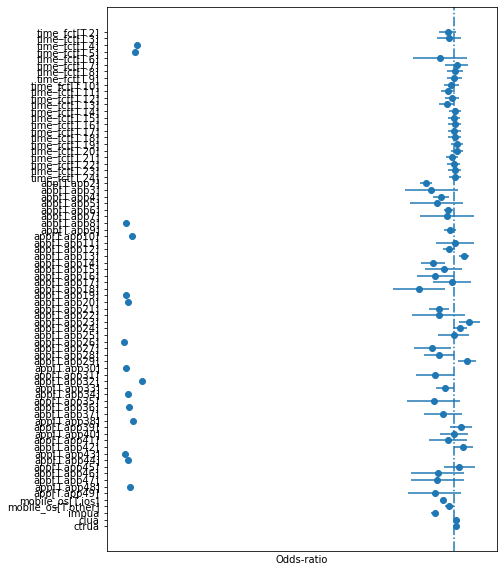

In [14]:
rsm.or_plot(lr_std,figsize=[7, 10])

In [15]:
rsm.model_fit(lr_std)


Pseudo R-squared (McFadden): 0.109
Pseudo R-squared (McFadden adjusted): 0.092
Area under the RO Curve (AUC): 0.792
Log-likelihood: -3946.072, AIC: 8046.145, BIC: 8768.389
Chi-squared: 159784.981 df(76), p.value < 0.001 
Nr obs: 87,535



After standardizing the numeric explanatory variables,the interpretation of the odds-ratios changed as well. Now the unit of standardized variable are all the same. Interpretations of the standardized odds-ratios are listed below.<br />
The Odds ratio for mobile IOS is 0.45, which indicates that for impression on ios mobile, the odds of click decrease by a factor of 0.45 compared with impressions on android,keeping all other variables constant.  <br />
The Odds ratio for mobile other is 0.719, which indicates that for impression on other mobile, the odds of click decrease by a factor of 0.719 compared with impressions on android,keeping all other variables constant.  <br />
The Odds ratio for impua is 0.236, which indicates that for every 1 standard unit increase in impua, the odds of click decrease by a factor of 0.236, keeping all other variables constant.  <br />
The Odds ratio for clua is 1.176, which indicates that for every 1 standard unit increase in clua, the odds of click  increase by a factor of 1.176, keeping all other variables constant.  <br />
The Odds ratio for ctrua is 1.127, which indicates that for every 1 standard unit increase in ctrua, the odds of click increase by a factor of 1.127,keeping all other variables constant. <br />
The variable impua is now the most important since it has the hightest relative difference (1/0.236) with 1 and exert the biggest impact on odds of click.This is different from my conclusions from (b) above. The model fit doesn't change after the standardization. The Pseudo R-squared, Chi-squared and p.value stay the same.

e. Estimate a logistic regression with `click_yes` as the response variable and `rnd` as the only explanatory variable. As before, the model should be estimated on the training sample (i.e., `training == 'train'`). Create a new variable `pred_rnd` with the predicted click-through probabilities.

In [16]:
# add your code
lr_rnd = smf.glm(
    formula="click_yes ~ rnd",
    family=Binomial(link=logit()),
    data= tz_gaming[tz_gaming['training']=='train']
).fit()
tz_gaming["pred_rnd"] = rsm.predict_ci(lr_rnd,tz_gaming)['prediction']

## Part II: Understanding Multicollinearity

a. Estimate a logistic regression model with `click_yes` as the response variable and `imppat`, `clpat`, and
`ctrpat` as the only explanatory variable. Make sure to standardize the explanatory variables before estimation (see example code below). What is the interpretation of the standardized odds-ratios for the explanatory variables?

Please see the ustandardized model, unstandardized model and corresponding odds ratio listed below.

In [63]:
# select variables to standardize
to_std = tz_gaming.loc[:, "impup":"ctrpat"].columns
# scale numeric variables by (x - mean(x)) / sd(x)
tz_std = tz_gaming.copy()
tz_std[to_std] = rsm.scale_df(
    tz_gaming[to_std], sf=1, train=tz_gaming.training == "train"
)

AxesSubplot(0.125,0.125;0.775x0.755)
    index     OR    OR%   2.5%  97.5% p.values     
1  imppat  1.000  -0.0%  1.000  1.000   < .001  ***
2   clpat  1.002   0.2%  1.001  1.002   < .001  ***
3  ctrpat  1.615  61.5%  1.510  1.727   < .001  ***


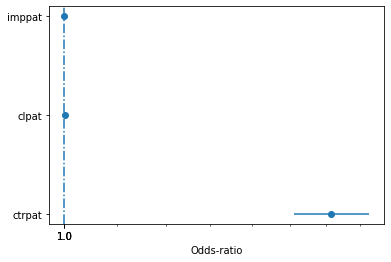

In [18]:
#unstandardized model
lr_mc1_unstd = smf.glm(
formula="click_yes ~ imppat + clpat + ctrpat",
    family=Binomial(link=logit()),
    data= tz_gaming[tz_gaming['training']=='train']).fit()
print(rsm.or_plot(lr_mc1_unstd))
print(rsm.or_ci(lr_mc1_unstd))

AxesSubplot(0.125,0.125;0.775x0.755)
    index     OR     OR%   2.5%  97.5% p.values     
1  imppat  0.366  -63.4%  0.243  0.552   < .001  ***
2   clpat  3.419  241.9%  2.242  5.212   < .001  ***
3  ctrpat  1.423   42.3%  1.354  1.495   < .001  ***


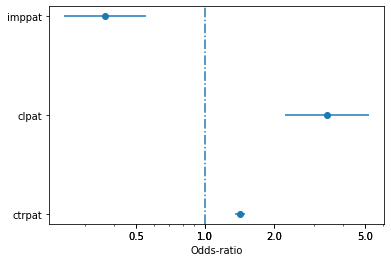

In [19]:
#standardized model
lr_mc1 = smf.glm(
formula="click_yes ~ imppat + clpat + ctrpat",
    family=Binomial(link=logit()),
    data= tz_std[tz_std['training']=='train']).fit()
lr_mc1.summary()
print(rsm.or_plot(lr_mc1))
print(rsm.or_ci(lr_mc1))

Interpretations of the unstandardized and standardized odds-ratios for the explanatory variables are different. The standardized odds-ratios are based on the same unit , while unstandardized odds-ratios are based on unit level of each  explanatory variable

b. Some of the variables in the dataset are highly correlated with each other. In particular, imppat
and clpat have a positive correlation of 0.97. Discuss the implications of this (very) high level of
collinearity and also different approaches to deal with it. What are the implications for the model and
the interpretation of the estimated (standardized) coefficients? As part of your answer, discuss the
change in the estimated (standardized) odds-ratios for imppat when you remove clpat from the model.

In [20]:
rsm.vif(lr_mc1)

,variable,vif,Rsq
0,clpat,26.242,0.962
1,imppat,23.467,0.957
2,ctrpat,1.668,0.400


As we can see from the above dataframe, variable clpat and imppat have a really high vif, which indicates a strong correlation and collinearity within the model. Collinearity could distort the model as well as significance of variable and generate inaccurate predictions. There are ways to deal with it. We cuold linearly combine the independent variables into one variable, such as adding them together.We also remove one of the correlated variable. I removed the variable clpat in the lr_mc2, please see code below.

In [21]:
lr_mc2 = smf.glm(
formula="click_yes ~ imppat + ctrpat",
    family=Binomial(link=logit()),
    data= tz_std[tz_std['training']=='train']).fit()
print(rsm.or_ci(lr_mc2))

    index     OR    OR%   2.5%  97.5% p.values     
1  imppat  1.188  18.8%  1.117  1.264   < .001  ***
2  ctrpat  1.499  49.9%  1.435  1.564   < .001  ***


In [22]:
print(rsm.or_ci(lr_mc1))

    index     OR     OR%   2.5%  97.5% p.values     
1  imppat  0.366  -63.4%  0.243  0.552   < .001  ***
2   clpat  3.419  241.9%  2.242  5.212   < .001  ***
3  ctrpat  1.423   42.3%  1.354  1.495   < .001  ***


In the model lr_mc1 (the one with multicollinearity),the ORs of imppat and clpat have a large gap meaning one variable exerts obvious positive effects on the odds of click while the other one exert obvious negative effects. 
After removing clpat from the model,the OR of imppat increased from 0.366 to 1.188 and exert positive effects on the odds of click as unit increases. The OR of imppat seems to be normalized and more neutral.The OR of 2 variables in model lr_mc2 are close to each other.

c. Estimate another logistic regression model with `click_yes` as the response variable and `time_fct`,
`app`, `imppat`, `clpat`, and `ctrpat` as the explanatory variable. Why are the odds ratios for `imppat`,
`clpat`, and `ctrpat` different in the two models? Please be specific and investigate beyond simply
stating the statistical problem.

In [23]:
# insert your code here
lr_mc3 = smf.glm(
formula="click_yes ~ time_fct + app + imppat + clpat + ctrpat",
    family=Binomial(link=logit()),
    data= tz_std[tz_std['training']=='train']).fit()

In [24]:
print(rsm.or_ci(lr_mc3)[71:])

     index     OR     OR%   2.5%  97.5% p.values   
72  imppat  0.604  -39.6%  0.252  1.446    0.258   
73   clpat  1.713   71.3%  0.676  4.338    0.256   
74  ctrpat  1.056    5.6%  0.892  1.251    0.524   


In [25]:
# you may find the code below useful
# the wald test evaluates is a (set of) coefficients are equal to 0
print(lr_mc3.wald_test_terms().table.round(3))
print(rsm.vif(lr_mc3))
print(rsm.model_fit(lr_mc3))

           statistic  pvalue  df_constraint
Intercept    452.901   0.000              1
time_fct      26.338   0.285             23
app           89.800   0.000             48
imppat         1.280   0.258              1
clpat          1.288   0.256              1
ctrpat         0.406   0.524              1
          variable     vif    Rsq
0           imppat  84.451  0.988
1            clpat  80.266  0.988
2           ctrpat   9.033  0.889
3      app[T.app2]   6.947  0.856
4   time_fct[T.15]   3.611  0.723
..             ...     ...    ...
69    app[T.app15]   1.031  0.030
70    app[T.app20]   1.030  0.029
71     app[T.app5]   1.026  0.026
72    app[T.app45]   1.023  0.023
73    app[T.app17]   1.019  0.018

[74 rows x 3 columns]

Pseudo R-squared (McFadden): 0.056
Pseudo R-squared (McFadden adjusted): 0.04
Area under the RO Curve (AUC): 0.704
Log-likelihood: -4180.646, AIC: 8511.292, BIC: 9214.776
Chi-squared: 83860.128 df(74), p.value < 0.001 
Nr obs: 87,535

None


The odds ratio is different because there are only 3 variables in II.a,while in II.c there are other variables. <br/> I also looked at the VIF of variables within the new model, we can see that imppat,clpat and ctrpat all have really high VIF. Therefore, the new model also has severe multicollinearity. Based on the wald test result, all these 3 variables have p.values greater than 0.005, which indicates these 3 variables are not statistically significant in the new model. As a result, we cannot reject the null hypothesis of having 0 coefficient and the 3 odds ratio are meaningless.

## Part III: Decile Analysis of Logistic Regression Results (5 points)

a. Assign each impression to a decile based on the predicted probability of click through (i.e., `pred_logit`). Create a new variable `dec_logit` that captures this information. Note: The first decile should have the highest average click-through rate. If that is not the case, make sure to “reverse” the decile numbers (i.e., 10 becomes 1, 9 becomes 2, etc.). Please use the `xtile` function from the _pyrsm_ package to create the deciles (2 points)

In [26]:
# insert your answer here
tz_gaming["dec_logit"] = tz_gaming.groupby('training')['pred_logit'].transform(rsm.xtile,10,rev = True)
p3_df = tz_gaming.copy()
p3_df = p3_df[p3_df['training'] == 'test']

b. Report the number of impressions, the number of clicks, and the click-through rate for the TZ ad per decile and save this information to a DataFrame. Use the name `df_dec_logit` for the new data frame (2 points)

In [27]:
# insert your answer here
num_impression = p3_df.groupby('dec_logit')['training'].count()
num_clicks = p3_df[p3_df['click']=='yes'].groupby('dec_logit')['training'].count()

In [28]:
df_dec_logit = pd.DataFrame().assign(numofimpression = num_impression,numofclicks =num_clicks )
df_dec_logit['click_through_rate'] = df_dec_logit['numofclicks']/df_dec_logit['numofimpression']
df_dec_logit = df_dec_logit.reset_index()
df_dec_logit

,dec_logit,numofimpression,numofclicks,click_through_rate
0,1,2796,103,0.036838
1,2,2793,48,0.017186
2,3,2788,42,0.015065
3,4,2796,30,0.010730
4,5,2802,15,0.005353
5,6,2796,7,0.002504
6,7,2794,7,0.002505
7,8,2796,3,0.001073
8,9,2796,4,0.001431
9,10,2796,12,0.004292


c. Create a bar chart of click-through rates per decile (i.e., use `dec_logit` as the x-variable and `click_yes` as the y-variable). Note that the "click through rate" is not the same as the "predicted probability of click." The click through rate captures the proportion of impressions in a given group (e.g., in a decile)
that actually resulted in a click (1 point)

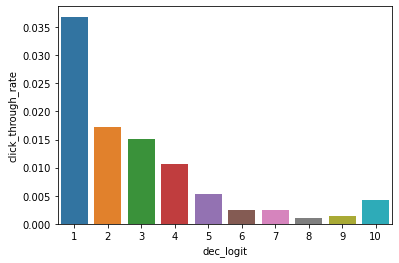

In [29]:
fig = sns.barplot(x = 'dec_logit',y = 'click_through_rate', data = df_dec_logit)

## Part IV: Lift, Gains, and Profit (15 points)

Use the `df_dec_logit DataFrame` you created in Part III for the following calculations.

> Note: Do NOT use any specialized packages to answer the questions below. Write the python code for the lift, gains, and profit tables from scratch and use seaborn, pandas, or matplotlib for the graphs

a. Write python code to generate a DataFrame with the cumulative proportion of impressions and the cumulative lift for each decile (3 points)

In [30]:
df_dec_logit["cum_impresison"] = df_dec_logit['numofimpression'].cumsum()
df_dec_logit['cum_click'] = df_dec_logit['numofclicks'].cumsum()
df_dec_logit['cum_imp_pro'] = (df_dec_logit['numofimpression']/len(p3_df)).cumsum()
den = df_dec_logit.numofclicks.sum()/ df_dec_logit.numofimpression.sum()
df_dec_logit['cum_lift'] = (df_dec_logit['cum_click']/df_dec_logit['cum_impresison'])/den
df_dec_logit['cum_gain'] = df_dec_logit['cum_click']/df_dec_logit.numofclicks.sum()

In [31]:
df_dec_logit.loc[-1] = [0, 0,0,0,0,0,0,0,0]  # adding a row
df_dec_logit.index = df_dec_logit.index + 1  # shifting index
df_dec_logit.sort_index(inplace=True) 

In [32]:
df_dec_logit

,dec_logit,numofimpression,numofclicks,click_through_rate,cum_impresison,cum_click,cum_imp_pro,cum_lift,cum_gain
0,0,0,0,0.000000,0,0,0.000000,0.000000,0.000000
1,1,2796,103,0.036838,2796,103,0.100025,3.799786,0.380074
2,2,2793,48,0.017186,5589,151,0.199943,2.786775,0.557196
3,3,2788,42,0.015065,8377,193,0.299682,2.376446,0.712177
4,4,2796,30,0.010730,11173,223,0.399707,2.058705,0.822878
5,5,2802,15,0.005353,13975,238,0.499946,1.756646,0.878229
6,6,2796,7,0.002504,16771,245,0.599971,1.506837,0.904059
7,7,2794,7,0.002505,19565,252,0.699925,1.328556,0.929889
8,8,2796,3,0.001073,22361,255,0.799950,1.176273,0.940959
9,9,2796,4,0.001431,25157,259,0.899975,1.061940,0.955720


In [33]:
# insert your answer here
lift_tab = pd.DataFrame().assign(cum_impression =df_dec_logit['cum_imp_pro'][1:] ,cum_lift = df_dec_logit['cum_lift'][1:])
lift_tab

,cum_impression,cum_lift
1,0.100025,3.799786
2,0.199943,2.786775
3,0.299682,2.376446
4,0.399707,2.058705
5,0.499946,1.756646
6,0.599971,1.506837
7,0.699925,1.328556
8,0.799950,1.176273
9,0.899975,1.061940
10,1.000000,1.000000


b. Use `seaborn`, `matplotlib`, or `pandas` to create a chart showing the cumulative lift per decile. Put cumulative lift on the Y-axis and cumulative proportion of impressions on the X-axis (2 points)

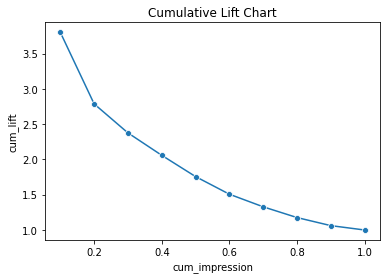

In [34]:
# insert your answer here
fig = sns.lineplot(x = 'cum_impression', y= 'cum_lift',data = lift_tab,marker ="o")
fig.set(title = 'Cumulative Lift Chart')
plt.show()

c. Write python code to generate a DataFrame with the cumulative proportion of impressions and the cumulative gains for each decile (3 points)

In [35]:
# insert your answer here
gains_tab = pd.DataFrame().assign(cum_impression =df_dec_logit['cum_imp_pro'] ,cum_gain = df_dec_logit['cum_gain'])
gains_tab

,cum_impression,cum_gain
0,0.000000,0.000000
1,0.100025,0.380074
2,0.199943,0.557196
3,0.299682,0.712177
4,0.399707,0.822878
5,0.499946,0.878229
6,0.599971,0.904059
7,0.699925,0.929889
8,0.799950,0.940959
9,0.899975,0.955720


d. Use `seaborn`, `matplotlib`, or `pandas` to create a chart showing the cumulative gains per decile along with a (diagonal) reference line to represent the "no model" scenario. Put cumulative gains on the Y-axis and cumulative proportion of impressions on the X-axis (2 points)

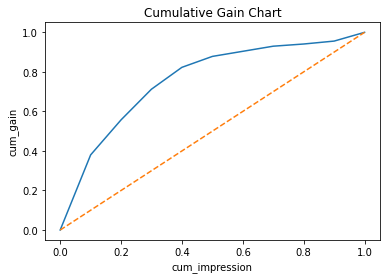

In [36]:
# insert your answer here
fig = sns.lineplot(x = 'cum_impression', y= 'cum_gain',data = gains_tab)
sns.lineplot(x = [0,1], y = [0,1],linestyle = '--')
fig.set(title = 'Cumulative Gain Chart')
plt.show()

e. Write python code to generate a table with the cumulative proportion of impressions and profits for each decile (3 points)

In [37]:
costperim = 10/1000
margin = 25
ratio = 0.05

In [38]:
df_dec_logit['adcost'] = df_dec_logit['cum_impresison']*costperim
df_dec_logit['salemargin'] = df_dec_logit['cum_click']*ratio*margin
df_dec_logit['profit'] = df_dec_logit['salemargin'] - df_dec_logit['adcost']
df_dec_logit

,dec_logit,numofimpression,numofclicks,click_through_rate,cum_impresison,cum_click,cum_imp_pro,cum_lift,cum_gain,adcost,salemargin,profit
0,0,0,0,0.000000,0,0,0.000000,0.000000,0.000000,0.00,0.00,0.00
1,1,2796,103,0.036838,2796,103,0.100025,3.799786,0.380074,27.96,128.75,100.79
2,2,2793,48,0.017186,5589,151,0.199943,2.786775,0.557196,55.89,188.75,132.86
3,3,2788,42,0.015065,8377,193,0.299682,2.376446,0.712177,83.77,241.25,157.48
4,4,2796,30,0.010730,11173,223,0.399707,2.058705,0.822878,111.73,278.75,167.02
5,5,2802,15,0.005353,13975,238,0.499946,1.756646,0.878229,139.75,297.50,157.75
6,6,2796,7,0.002504,16771,245,0.599971,1.506837,0.904059,167.71,306.25,138.54
7,7,2794,7,0.002505,19565,252,0.699925,1.328556,0.929889,195.65,315.00,119.35
8,8,2796,3,0.001073,22361,255,0.799950,1.176273,0.940959,223.61,318.75,95.14
9,9,2796,4,0.001431,25157,259,0.899975,1.061940,0.955720,251.57,323.75,72.18


In [39]:
# insert your answer here
profit_tab = pd.DataFrame().assign(cum_impression =df_dec_logit['cum_imp_pro'] ,profit = df_dec_logit['profit'])
profit_tab

,cum_impression,profit
0,0.000000,0.00
1,0.100025,100.79
2,0.199943,132.86
3,0.299682,157.48
4,0.399707,167.02
5,0.499946,157.75
6,0.599971,138.54
7,0.699925,119.35
8,0.799950,95.14
9,0.899975,72.18


f. Use `seaborn`, `matplotlib`, or `pandas` to create a chart showing the profits per decile. Put profit on the Y-axis and cumulative proportion of impressions on the X-axis (2 points)

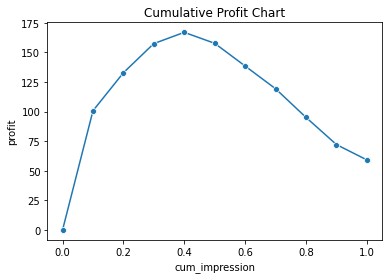

In [40]:
# insert your answer here
fig = sns.lineplot(x = 'cum_impression', y= 'profit',data = profit_tab, marker = 'o')
fig.set(title = 'Cumulative Profit Chart')
plt.show()

## Part V: Confusion matrix (10 points)

a. Create a DataFrame with elements from a "confusion matrix" based on the predictions from the logistic regression model you estimated in Part I (i.e., `pred_logit`). Again, use only data from the test set here (i.e., `training == 'test'`).

Use the financial assumptions mentioned above, and repeated in section VI below, to determine an appropriate cut-off (i.e., break-even). Calculate `accuracy` based on the confusion matrix you created (see <http://lab.rady.ucsd.edu/sawtooth/RBusinessAnalytics/logit_models.html> for an example using R) (2 points)

> Note: Do NOT use any specialized packages to construct the confusion matrix. Write the python code to construct the confusion matrix from scratch

Based on the financial assumptions listed above, I believe the breakeven equation should be
cost = probability_of_click * CLV * 0.005. Drived from this equation, the cut-off probabilty is 0.008.
This number is close to the probability indicated by the cumulative profit graph as well.

In [41]:
def cf_matrix(df, prob , method = None):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    df = df[df['training'] == 'test']
    predict = []
    for i in df[method]:
        if i > prob :
            predict.append(1)
        else:
            predict.append(0)  
    actual = list(df['click_yes'])
    for i in range(len(predict)):
        if (predict[i] == 1 and actual[i] == 1):
            TP +=1
        elif(predict[i] == 0 and actual[i] == 0) :
            TN +=1
        elif(predict[i] == 0 and actual[i] == 1):
            FN +=1
        else: 
            FP +=1
    return [TP,FP,TN,FN]

In [42]:
# confusion matrix
cl_logit = cf_matrix(tz_gaming,0.008,"pred_logit")
cm_logit = pd.DataFrame(
    {
        "label": ["TP", "FP", "TN", "FN"],
        "nr": cl_logit # TP, FP, TN, and FN values in that order
    }
)
cm_logit

,label,nr
0,TP,221
1,FP,10661
2,TN,17021
3,FN,50


In [43]:
accuracy_logit = (cm_logit.iloc[0,1] + cm_logit.iloc[2,1]) /cm_logit.nr.sum()
accuracy_logit

0.6168210925482059

b. Calculate a DataFrame with elements from a confusion matrix based on `pred_rnd` created in Part I and calculate `accuracy` based on the confusion matrix you created (2 points)

In [44]:
# confusion matrix
cl_rnd = cf_matrix(tz_gaming,0.008,"pred_rnd")
cm_rnd = pd.DataFrame(
    {
        "label": ["TP", "FP", "TN", "FN"],
        "nr": cl_rnd # TP, FP, TN, and FN values in that order
    }
)
cm_rnd

,label,nr
0,TP,271
1,FP,27606
2,TN,76
3,FN,0


In [45]:
accuracy_rnd = (cm_rnd.iloc[0,1] + cm_rnd.iloc[2,1]) /cm_rnd.nr.sum()# float
accuracy_rnd

0.012413694415626229

c. Discuss the similarities and differences between the two confusion matrices. Which prediction (model) is best, based on the confusion matrix? Provide support for your conclusions (3 points)

Similarities between the 2 matrices are they has relatively close number of TP and FN. However,the number of TN is different and model logit is better at identifying negative cases. Based on the discussion in the lecture, the value/profit produced by 4 categories in descending order is TP,TN,FP,FN. Logit model is a better as it has a higher sum of TP&TN as well as a higher accuracy (62% compared with rnd of 1.2%). Logit model also has a higher TP/(TP + FP) rate. <br/>
 Every business has there own metric to evaluate performances. From my perspective,the accuracy is really critical for the advertising targeting as well as this case, since we want to maximize the number of clicks given a certain amount of impression. 

d. Recalculate the confusion matrices from V.a and V.b using 0.5 as the cutoff. Based on these new matrices, again discuss the similarities and differences. Which model is best based on these new confusion matrices? Provide support for your conclusions (3 points)

In [46]:
cl_logit_recal = cf_matrix(tz_gaming,0.5,"pred_logit")
# confusion matrix
cm_logit_recalc = pd.DataFrame(
    {
        "label": ["TP", "FP", "TN", "FN"],
        "nr": cl_logit_recal# TP, FP, TN, and FN values in that order
    }
)
cm_logit_recalc

,label,nr
0,TP,0
1,FP,0
2,TN,27682
3,FN,271


In [47]:
accuracy_logit_recalc =(cm_logit_recalc.iloc[0,1] + cm_logit_recalc.iloc[2,1]) /cm_logit_recalc.nr.sum()# float # float
accuracy_logit_recalc

0.9903051550817443

In [48]:
# confusion matrix
cl_rnd_recal = cf_matrix(tz_gaming,0.5,"pred_rnd")
cm_rnd_recalc = pd.DataFrame(
    {
        "label": ["TP", "FP", "TN", "FN"],
        "nr": cl_rnd_recal# TP, FP, TN, and FN values in that order
    }
)
cm_rnd_recalc

,label,nr
0,TP,0
1,FP,0
2,TN,27682
3,FN,271


In [49]:
accuracy_rnd_recalc = (cm_rnd_recalc.iloc[0,1] + cm_rnd_recalc.iloc[2,1]) /cm_rnd_recalc.nr.sum()# float # float
accuracy_rnd_recalc

0.9903051550817443

Based on the 0.5 cutoff, the 2 new matrices are identical to each other and we are not able to identify a better model. Even though both of them has an accuracy of 0.99, which is higher compared with matrices in V.a&b, the 0.5 threshold is not reasonable from a business perspective. A 0.5 threshold will prevent the business from targeting any customers and generating profits. This example indicates the significance of combining matrices and business situations together to solve problems.


## Part VI: Model comparison (12 points)


a. Create a new variable `target_logit` that is `True` if the predicted click-through (`pred_logit`) probability is greater than the break-even response rate and `FALSE` otherwise (1 point)

In [50]:
# insert your answer here
tz_gaming["target_logit"] = np.where(tz_gaming['pred_logit'] >  0.008, True, False)

b. Create a new variable `target_rnd` that is `True` if the predicted click-through (`pred_rnd`) probability is greater than the break-even response rate and `FALSE` otherwise (1 point)

In [51]:
# insert your answer here
tz_gaming["target_rnd"] = np.where(tz_gaming['pred_rnd'] >  0.008, True, False)

c. Create a new variable `target_vneta` that is `True` if the predicted click-through (`pred_vneta`) probability is greater than the break-even response rate and `False` otherwise (1 point)

In [52]:
# insert your answer here
tz_gaming["target_vneta"] = np.where(tz_gaming['pred_vneta'] >  0.008, True, False)

d. Based only on the test set (i.e, `training == "test"`), calculate the expected profit (in dollars) and the expected return on marketing expenditures (ROME) if TZ (1) `spams` everyone in the test set, (2) continues to target using their current approach (`pred_rnd`), (3) purchases the data from Vneta and uses the logistic regression from I (`pred_logit`) for targeting, or (4) used Vneta's data science consulting services (`pred_vneta`) (3 points)

> Note: For efficiency, you can adapt the `perf_calc_actual` function you created for the Tuango case to do the relevant performance calculations for the different models

In [53]:
def expected_performance(df, method = None,):
    df = df[df['training'] == 'test']
    # total number of impression that would be sent out
    if method == 'spam':
        nr_sms = len(df)
        smsto = sum(df.click_yes)

    elif method == 'pred_rnd' :
        nr_sms = sum(df.target_rnd)
        smsto = sum(df[df['target_rnd'] == True].click_yes)

    elif method == 'pred_logit':
        nr_sms = sum(df.target_logit)
        smsto = sum(df[df['target_logit'] == True].click_yes)

    else :
        nr_sms = sum(df.target_vneta)
        smsto = sum(df[df['target_vneta'] == True].click_yes)



     # total number of SMSs that would be sent out
    sms_cost = nr_sms* (10/1000)  # total cost in RMB (no rounding)
    revenue_nt = smsto*25*0.05    # total revenue in RMB (no rounding)
    profit_nt = revenue_nt - sms_cost # total profit in RMB (no rounding)
    ROME_nt = profit_nt/sms_cost # Return on Marketing Expenditures expressed as a proportion (no rounding)

    print( 'based on the ',method, 'method', 
    ':\nTotal number of impression that would be sent out :',nr_sms, #Total number of SMSs that would be sent out
          ':\nTotal clickt :',smsto,
    "\nTotal cost :" ,sms_cost , #Total revenue in RMB (no rounding)
    "\nTotal revenue :",revenue_nt, #Total revenue in RMB (no rounding)
    "\nTotal profit :",profit_nt, #Total profit in RMB (no rounding)，
          "\nROME:", round(100 * ROME_nt, 3), "%"
        )

    return [profit_nt,ROME_nt,nr_sms,smsto]

In [54]:
logit = expected_performance(tz_gaming,"pred_logit")
rnd = expected_performance(tz_gaming,"pred_rnd")
vneta = expected_performance(tz_gaming,"pred_vneta")
spam =  expected_performance(tz_gaming,"spam")

based on the  pred_logit method :
Total number of impression that would be sent out : 10882 :
Total clickt : 221 
Total cost : 108.82000000000001 
Total revenue : 276.25 
Total profit : 167.43 
ROME: 153.86 %
based on the  pred_rnd method :
Total number of impression that would be sent out : 27877 :
Total clickt : 271 
Total cost : 278.77 
Total revenue : 338.75 
Total profit : 59.98000000000002 
ROME: 21.516 %
based on the  pred_vneta method :
Total number of impression that would be sent out : 4871 :
Total clickt : 160 
Total cost : 48.71 
Total revenue : 200.0 
Total profit : 151.29 
ROME: 310.593 %
based on the  spam method :
Total number of impression that would be sent out : 27953 :
Total clickt : 271 
Total cost : 279.53000000000003 
Total revenue : 338.75 
Total profit : 59.21999999999997 
ROME: 21.186 %


In [55]:
# calculate and add profit and ROME values for each approach
# to the mod_perf data frame
tz_gaming["pred_spam"] = 1
tz_gaming["target_spam"] = True

mod_perf = pd.DataFrame(
    {
        "model": [
            "logit",
            "rnd",
            "vneta",
            "spam",
        ],
        "profit": [logit[0],rnd[0],vneta[0],spam[0]],
        "ROME": [logit[1],rnd[1],vneta[1],spam[1]]
    }
)

In [56]:
mod_perf

,model,profit,ROME
0,logit,167.43,1.538596
1,rnd,59.98,0.215159
2,vneta,151.29,3.105933
3,spam,59.22,0.211856


e. Based on the results from VI.d discuss which of these 4 approaches you would recommend and why (2 points)

Just based on the dataframe above and the current dataset, I would recommend the vneta approach since it has the highest ROME. The model with the highest Rome could help company generate the most porfit given a same amount of cost. However this calculation doesn't incorporate the cost related to buying data/services, a more comprehensive calculation regarding campaign selection is performed below.

f. Calculate the profit and ROME implications for each of the 4 options mentioned in VI.d if TZ purchases 20-million impression for the upcoming ad campaign (2 points)

> Note: For efficiency, you can adapt the `perf_calc` function you created for the Tuango case to do the relevant performance calculations for the different models.

In [60]:
cam_cost = np.repeat((20000000/1000)*10,4)
mul = 20000000
rev = 25 * 0.05
revenue = np.array([(logit[3]*rev*mul)/logit[2],(rnd[3]*rev*mul)/rnd[2],(vneta[3]*rev*mul)/vneta[2],(spam[3]*rev*mul)/spam[2]])
add_cost = np.array([50000,0,150000,0])
total_cost = cam_cost + add_cost
profit = revenue - total_cost
rome = profit/total_cost


In [61]:
# insert your answer here
mod_perf_20M = pd.DataFrame(
    {
        "model": [
            "logit",
            "rnd",
            "vneta",
            "spam",
        ],
        "profit": profit,
        "ROME": rome
    }
)
mod_perf_20M

,model,profit,ROME
0,logit,257719.169270,1.030877
1,rnd,43031.890089,0.215159
2,vneta,471186.614658,1.346247
3,spam,42371.122956,0.211856


g. Based on the results from VI.f, discuss which of the 4 approaches you would recommend to put into production and why. Is your recommendation different from VI.e? Why (not) (2 points)

Based on the results from VI.f, I would recommend using predictions generated by Vneta for ad targeting campaign. This recommendation is not different from VI.e since the benefits/profits generated from using the vneta model is higher than the cost of obtaining it. Therefore, eventhough it cost 150k to use the vneta model, it is still the best option. This recommendation is based on the financial assumptions that listed above and also the amount of impressions we buy. If we choose to buy 5-million impressions, the recommendation will be different.

## Testing

Run the cell below to determine if all of required variables are available and are of the correct type

In [62]:
print("===============================================")
print("Testing for code completeness")
print("===============================================")

if "tz_gaming" not in locals():
    raise NameError("Did you not load the tz_gaming data?")
else:
    if not hasattr(tz_gaming, "click_yes"):
        raise NameError("tz_gaming should have a variable 'click_yes'")
        
    ### section I
    if "lr" not in locals():
        raise NameError("Part I: Your code should have a fitted logistic regression model called 'lr'")
    if not hasattr(tz_gaming, "pred_logit"):
        raise NameError("Part I: tz_gaming should have a variable 'pred_logit'")
    if "lr_std" not in locals():
        raise NameError("Part I: Your code should have a fitted logistic regression model called 'lr_std'")
    if "lr_rnd" not in locals():
        raise NameError("Part I: Your code should have a fitted logistic regression model called 'lr_rnd'")
    if not hasattr(tz_gaming, "pred_rnd"):
        raise NameError("Part I: tz_gaming should have a variable 'pred_rnd'")
        
    ### section II
    if "lr_mc1" not in locals():
        raise NameError("Part II: Your code should have a fitted logistic regression model called 'lr_mc1'")
    if "lr_mc2" not in locals():
        raise NameError("Part II: Your code should have a fitted logistic regression model called 'lr_mc2'")
    if "lr_mc3" not in locals():
        raise NameError("Part II: Your code should have a fitted logistic regression model called 'lr_mc3'")
    
    ## section III
    if not hasattr(tz_gaming, "dec_logit"):
        raise NameError("Part III: tz_gaming should have a variable 'dec_logit'")
    if "df_dec_logit" not in locals():
        raise NameError("Part III: Your code should have a DataFrame called 'df_dec_logit'")
    elif type(df_dec_logit) != pd.DataFrame:
        raise NameError("Part III: 'df_dec_logit' should be a pandas DataFrame")
        
    ## section IV
    if "lift_tab" not in locals():
        raise NameError("Part IV: Your code should have a DataFrame called 'lift_tab'")
    elif type(lift_tab) != pd.DataFrame:
        raise NameError("Part IV: 'lift_tab' should be a pandas DataFrame")
    if "gains_tab" not in locals():
        raise NameError("Part IV: Your code should have a DataFrame called 'gains_tab'")
    elif type(gains_tab) != pd.DataFrame:
        raise NameError("Part IV: 'gains_tab' should be a pandas DataFrame")
    if "profit_tab" not in locals():
        raise NameError("Part IV: Your code should have a DataFrame called 'profit_tab'")
    elif type(profit_tab) != pd.DataFrame:
        raise NameError("Part IV: 'profit_tab' should be a pandas DataFrame")
        
    ## section V
    if "cm_logit" not in locals():
        raise NameError("Part V: Your code should have a DataFrame called 'cm_logit'")
    else:
        if type(cm_logit) != pd.DataFrame:
            raise NameError("Part V: 'cm_logit' should be a pandas DataFrame")
        else:
            if not hasattr(cm_logit, "label"):
                raise NameError("Part V: 'cm_logit' should have a column 'label'")
            elif not all(cm_logit.label == ["TP", "FP", "TN", "FN"]):
                raise NameError("Part V: 'cm_logit.label' should have values ['TP', 'FP', 'TN', 'FN']")
                
            if not hasattr(cm_logit, "nr"):
                raise NameError("Part V: 'cm_logit' should have a column 'nr'")
            elif not all([type(t) in [int, float] for t in cm_logit.nr]):
                raise NameError("Part V: 'cm_logit.nr' values should be of type int or float")
                
    if "accuracy_logit" not in locals():
        raise NameError("Part V: Your code should have a float called 'accuracy_logit'")
    elif not (isinstance(accuracy_logit, np.floating) or isinstance(accuracy_logit, float)):
        raise NameError("Part V: 'accuracy_logit' should be of type int or float")
        
    if "cm_rnd" not in locals():
        raise NameError("Part V: Your code should have a DataFrame called 'cm_rnd'")
    else:
        if type(cm_rnd) != pd.DataFrame:
            raise NameError("Part V: 'cm_rnd' should be a pandas DataFrame")
        else:
            if not hasattr(cm_rnd, "label"):
                raise NameError("Part V: 'cm_rnd' should have a column 'label'")
            elif not all(cm_rnd.label == ["TP", "FP", "TN", "FN"]):
                raise NameError("Part V: 'cm_rnd.label' should have values ['TP', 'FP', 'TN', 'FN']")
                
            if not hasattr(cm_rnd, "nr"):
                raise NameError("Part V: 'cm_rnd' should have a column 'nr'")
            elif not all([type(t) in [int, float] for t in cm_rnd.nr]):
                raise NameError("Part V: 'cm_rnd.nr' values should be of type int or float")
                
    if "accuracy_rnd" not in locals():
        raise NameError("Part V: Your code should have a float called 'accuracy_rnd'")
    elif not (isinstance(accuracy_rnd, np.floating) or isinstance(accuracy_rnd, float)):
        raise NameError("Part V: 'accuracy_rnd' should be of type float")
 
    if "cm_logit_recalc" not in locals():
        raise NameError("Part V: Your code should have a DataFrame called 'cm_logit_recalc'")
    else:
        if type(cm_logit_recalc) != pd.DataFrame:
            raise NameError("Part V: 'cm_logit_recalc' should be a pandas DataFrame")
        else:
            if not hasattr(cm_logit_recalc, "label"):
                raise NameError("Part V: 'cm_logit_recalc' should have a column 'label'")
            elif not all(cm_logit_recalc.label == ["TP", "FP", "TN", "FN"]):
                raise NameError("Part V: 'cm_logit_recalc.label' should have values ['TP', 'FP', 'TN', 'FN']")
                
            if not hasattr(cm_logit_recalc, "nr"):
                raise NameError("Part V: 'cm_logit_recalc' should have a column 'nr'")
            elif not all([type(t) in [int, float] for t in cm_logit_recalc.nr]):
                raise NameError("Part V: 'cm_logit_recalc.nr' values should be of type int or float")
                
    if "accuracy_logit_recalc" not in locals():
        raise NameError("Part V: Your code should have a float called 'accuracy_logit_recalc'")
    elif not (isinstance(accuracy_logit_recalc, np.floating) or isinstance(accuracy_logit_recalc, float)):
        raise NameError("Part V: 'accuracy_logit_recalc' should be of type int or float")
        
    if "cm_rnd_recalc" not in locals():
        raise NameError("Part V: Your code should have a DataFrame called 'cm_rnd_recalc'")
    else:
        if type(cm_rnd_recalc) != pd.DataFrame:
            raise NameError("Part V: 'cm_rnd_recalc' should be a pandas DataFrame")
        else:
            if not hasattr(cm_rnd_recalc, "label"):
                raise NameError("Part V: 'cm_rnd_recalc' should have a column 'label'")
            elif not all(cm_rnd_recalc.label == ["TP", "FP", "TN", "FN"]):
                raise NameError("Part V: 'cm_rnd.label_recalc' should have values ['TP', 'FP', 'TN', 'FN']")
                
            if not hasattr(cm_rnd_recalc, "nr"):
                raise NameError("Part V: 'cm_rnd_recalc' should have a column 'nr'")
            elif not all([type(t) in [int, float] for t in cm_rnd_recalc.nr]):
                raise NameError("Part V: 'cm_rnd_recalc.nr' values should be of type int or float")
                
    if "accuracy_rnd_recalc" not in locals():
        raise NameError("Part V: Your code should have a float called 'accuracy_rnd_recalc'")
    elif not (isinstance(accuracy_rnd_recalc, np.floating) or isinstance(accuracy_rnd_recalc, float)):
        raise NameError("Part V: 'accuracy_rnd_recalc' should be of type float")

 
    ## section VI
    if not hasattr(tz_gaming, "target_logit"):
        raise NameError("Part VI: tz_gaming should have a variable 'target_logit'")
    if not hasattr(tz_gaming, "target_rnd"):
        raise NameError("Part VI: tz_gaming should have a variable 'target_rnd'")
    if not hasattr(tz_gaming, "target_vneta"):
        raise NameError("Part VI: tz_gaming should have a variable 'target_vneta'")
    if not hasattr(tz_gaming, "target_spam"):
        raise NameError("Part VI: tz_gaming should have a variable 'target_spam'")
    if not hasattr(tz_gaming, "pred_spam"):
        raise NameError("Part VI: tz_gaming should have a variable 'pred_spam'")
 
    if "mod_perf" not in locals():
        raise NameError("Part VI: Your code should have a DataFrame called 'mod_per'")
    else:
        if type(mod_perf) != pd.DataFrame:
            raise NameError("Part VI: 'mod_perf' should be a pandas DataFrame")
        else:
            if not hasattr(mod_perf, "model"):
                raise NameError("Part VI: 'model' should have a column 'model'")
            elif not all(mod_perf.model == ["logit", "rnd", "vneta", "spam"]):
                raise NameError("Part VI: 'mod_perf' should have values ['logit', 'rnd', 'vneta', 'spam']")
                
            if not hasattr(mod_perf, "profit"):
                raise NameError("Part VI: 'mod_perf' should have a column 'profit'")
            elif not all([isinstance(p, float) or (isinstance(p, np.floating)) for p in mod_perf.profit]):
                raise NameError("Part VI: 'profit' values in 'mod_perf' should be of type float")
 
            if not hasattr(mod_perf, "ROME"):
                raise NameError("Part VI: 'mod_perf' should have a column 'ROME'")
            elif not all([isinstance(p, float) or (isinstance(p, np.floating)) for p in mod_perf.ROME]):
                raise NameError("Part VI: 'ROME' values in 'mod_perf' should be of type float")
 
    if "mod_perf" not in locals():
        raise NameError("Part VI: Your code should have a DataFrame called 'mod_per'")
    else:
        if type(mod_perf_20M) != pd.DataFrame:
            raise NameError("Part VI: 'mod_perf_20M' should be a pandas DataFrame")
        else:
            if not hasattr(mod_perf_20M, "model"):
                raise NameError("Part VI: 'model' should have a column 'model'")
            elif not all(mod_perf_20M.model == ["logit", "rnd", "vneta", "spam"]):
                raise NameError("Part VI: 'mod_perf_20M' should have values ['logit', 'rnd', 'vneta', 'spam']")
                
            if not hasattr(mod_perf_20M, "profit"):
                raise NameError("Part VI: 'mod_perf_20M' should have a column 'profit'")
            elif not all([isinstance(p, float) or (isinstance(p, np.floating)) for p in mod_perf_20M.profit]):
                raise NameError("Part VI: 'profit' values in 'mod_perf_20M' should be of type float")
 
            if not hasattr(mod_perf_20M, "ROME"):
                raise NameError("Part VI: 'mod_perf_20M' should have a column 'ROME'")
            elif not all([isinstance(p, float) or (isinstance(p, np.floating)) for p in mod_perf_20M.ROME]):
                raise NameError("Part VI: 'ROME' values in 'mod_perf_20M' should be of type float")
 
 
print("===============================================")
print("Testing complete")
print("===============================================")

Testing for code completeness
Testing complete
